In [2]:
import tweepy

In [3]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

# World Leaders Twitter Sentiment Analyzer Web App -
# Joe Biden - President of United States of America

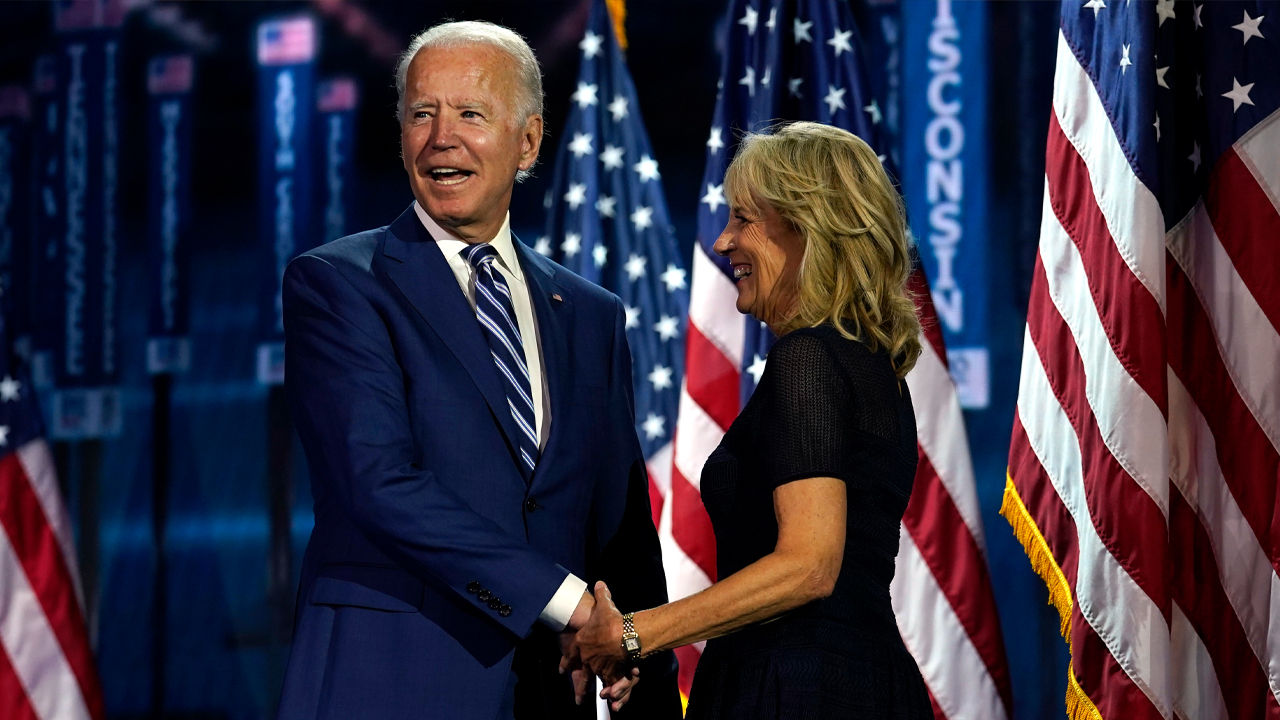

In [218]:
from IPython.display import Image
Image(filename='joe.jpg')

In [7]:
import nltk
from nltk.corpus import stopwords

In [9]:
 #Twitter Credentials

consumer_key = ####
consumer_secret = ###

access_token = ####
access_token_secret = ####

In [10]:
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret) 

In [11]:
authenticate.set_access_token(access_token, access_token_secret) 

In [12]:
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [220]:
screen_name1 = 'JoeBiden'

In [221]:
alltweets = []  
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
new_tweets = api.user_timeline(screen_name = screen_name1,count=200)
    
    #save most recent tweets
alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
oldest = alltweets[-1].id - 1
    
    #keep grabbing tweets until there are no tweets left to grab
while len(new_tweets) > 0:
    #print(f"getting tweets before {oldest}")
        
        #all subsiquent requests use the max_id param to prevent duplicates
    new_tweets = api.user_timeline(screen_name = screen_name1,count=200,max_id=oldest)
        
        #save most recent tweets
    alltweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
        
    #print(f"...{len(alltweets)} tweets downloaded so far")
    


In [222]:
for j in alltweets:
    
    #print("retweet count is :", j.retweet_count)
    #print("tweet is :", j.full_text)
    totaltweet = j.user.statuses_count
    followin = j.user.friends_count
    Descriptio = j.user.description
    follower = j.user.followers_count
    Prof_image_ur = j.user.profile_image_url

# Twitter Account Description

In [223]:
print("Desrciption is :",Descriptio)

Desrciption is : President of the United States, husband to @DrBiden, proud father & grandfather. Ready to build back better for all Americans.


In [ ]:
Justin Trudeau - Desrciption is : Father, husband, 23rd Prime Minister of Canada. Account run by PM & staff.
    Papa, mari, 23e premier ministre du Canada. Compte géré par le PM et son personnel.
    
Kamala Harris - Desrciption is : Vice President of the United States. Wife, Momala, Auntie. Fighting for the people. She/her.

Narendra Modi -   Desrciption is : Prime Minister of India

Boris Johnson - Desrciption is : Prime Minister of the United Kingdom and @Conservatives leader. Member of Parliament for Uxbridge and South Ruislip
    
Jacinda Ardern - Desrciption is : Prime Minister of NZ. Leader @nzlabour. Won't tweet what I ate for breakfast-make no promises beyond that. Authorised by Timothy Grigg 160 Willis St, Wellington
    
Scott Morrison - Desrciption is : Prime Minister of Australia and Federal Member for Cook. Authorised by S. Morrison, Liberal Party of Australia, Canberra.
    
Joe Biden - Desrciption is : President of the United States, husband to @DrBiden, proud father & grandfather. Ready to build back better for all Americans.

# Twitter Account Profile Image

Profile image url is : http://pbs.twimg.com/profile_images/1308769664240160770/AfgzWVE7_normal.jpg


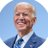

In [256]:
print("Profile image url is :", Prof_image_ur)
from IPython.display import Image
Profile_Image = Image(Prof_image_ur)
Profile_Image

# Twitter Account Followers

In [257]:
print('The number of followers this Twitter Account has are: ', follower)

The number of followers this Twitter Account has are:  27834129


# Twitter Account Following

In [258]:
print('The number of Twitter Accounts followed by this Twitter Account has are: ', followin)

The number of Twitter Accounts followed by this Twitter Account has are:  46


# Total Tweets by this Twitter Account

In [259]:
print('The total number of tweets by this Twitter Account are:', totaltweet)

The total number of tweets by this Twitter Account are: 7174


In [224]:
twt = []
hshtg = []
retweet = []

for twee in alltweets:

    twt.append(twee.text)
    retweet.append(twee.retweet_count)
    hs = twee.entities['hashtags']
    if len(hs) != 0:
        
        hh_list = []
        for i in range(len(hs)):
            dct = hs[i]
            hh_list.append(str(dct.get('text')))
        hshtg.append(hh_list)
        
    else:
        hshtg.append([])
        

In [225]:
dicts = {'Tweets': twt, 'Hashtags': hshtg, 'Retweets':retweet}  

In [226]:
dfs = pd.DataFrame(dicts)

In [227]:
dfs.shape

(3238, 3)

# Tweets Dataset

In [228]:
dfs.head()

,Tweets,Hashtags,Retweets
0,RT @POTUS: Making vaccines free and accessible...,[],11086
1,RT @POTUS: We don’t have a second to waste whe...,[],12451
2,"RT @POTUS: For your family, for your neighbors...",[],35178
3,RT @POTUS: Everyone who wants a vaccine should...,[],16707
4,"RT @POTUS: Last year, Michele lost her job bec...",[],8890


# Tweets Word Count Distribution

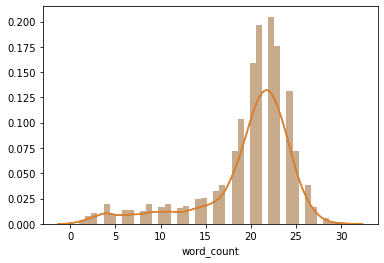

In [260]:
# Word Count Distribution Histogram

dfs["word_count"] = dfs["Tweets"].apply(lambda tweet: len(tweet.split()))
sns_plot = sns.distplot(dfs['word_count'])
fig = sns_plot.get_figure()
fig.savefig("bbc_word_count.png")
sns.distplot(dfs['word_count'])

In [28]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [29]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [30]:
senti_analyzer = SentimentIntensityAnalyzer()

In [229]:
compound_score = []

for sen in dfs['Tweets']:
    
    compound_score.append(senti_analyzer.polarity_scores(sen)['compound'])

In [230]:
dfs['Compound Score'] = compound_score

In [231]:
Sentiment = []

for i in compound_score:
    
    if i >= 0.05:
        
        Sentiment.append('Positive')
        
    elif i > -0.05 and i < 0.05:
        
        Sentiment.append('Neutral')
        
    else:
        
        Sentiment.append('Negative')
        

In [232]:
dfs['Sentiment'] = Sentiment

In [233]:
pos_count = sum(dfs['Sentiment']=='Positive')
neg_count = sum(dfs['Sentiment']=='Negative')
neu_count = sum(dfs['Sentiment']=='Neutral')

In [238]:
pd.set_option('display.max_rows', None)

# Most Positive Tweet

In [241]:
# Most Positive Tweet

pos_max = (dfs.loc[dfs['Compound Score']==max(dfs['Compound Score'])].to_string())
pos_max

"                                                                                                                                            Tweets Hashtags  Retweets  Compound Score Sentiment\n1155  Receiving the Medal of Freedom from my friend @BarackObama was a great, great honor. I'm proud to have dedicated my… https://t.co/lbUazDNc5q       []     28965          0.9818  Positive"

# Positive Tweets

In [242]:
# Positive Tweets

gp = dfs.groupby(by=['Sentiment'])
positive_tweets = gp.get_group('Positive')
positive_tweets.head()

,Tweets,Hashtags,Retweets,Compound Score,Sentiment
0,RT @POTUS: Making vaccines free and accessible...,[],11086,0.7650,Positive
3,RT @POTUS: Everyone who wants a vaccine should...,[],16707,0.7650,Positive
5,"RT @POTUS: This morning, I met with House Demo...",[],7273,0.5106,Positive
9,RT @POTUS: Let me be clear: The risk in this m...,[],20789,0.1280,Positive
10,RT @POTUS: Officer Brian Sicknick was a hero w...,[],12600,0.5267,Positive


In [77]:
positive_tweets.shape

(1616, 6)

# Neutral Tweets

In [244]:
# Neutral Tweets

neutral_tweets = gp.get_group('Neutral')
neutral_tweets.head()

,Tweets,Hashtags,Retweets,Compound Score,Sentiment
2,"RT @POTUS: For your family, for your neighbors...",[],35178,0.0000,Neutral
6,RT @POTUS: America is back. Diplomacy is back....,[],10623,0.0000,Neutral
7,"RT @POTUS: This afternoon, I’m visiting the @S...",[],4170,0.0000,Neutral
11,RT @POTUS: No one should lose their home in th...,[],14460,0.0258,Neutral
14,"RT @POTUS: In order to get America vaccinated,...",[],13911,0.0000,Neutral


In [81]:
neutral_tweets.shape

(774, 6)

# Wordcloud Function

In [245]:
# Wordcloud Function

def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [246]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['says','say', 'news','new']
stopwords.extend(newStopWords)

In [247]:
def wordcloud(data):
    
    words_corpus = ''
    words_list = []

    
    for rev in data["Tweets"]:
        
        text = str(rev).lower()
        text = text.replace('rt', ' ') 
        text = re.sub(r"http\S+", "", text)        
        text = re.sub(r'[^\w\s]','',text)
        text = ''.join([i for i in text if not i.isdigit()])
        
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords]
        
        # Remove aplha numeric characters
        
        for words in tokens:
            
            words_corpus = words_corpus + words + " "
            words_list.append(words)
            
    return words_corpus, words_list

In [248]:
import cv2
image1 = cv2.imread('mask1.png')
mask = np.array(image1)

# WordCloud - Positive Tweets

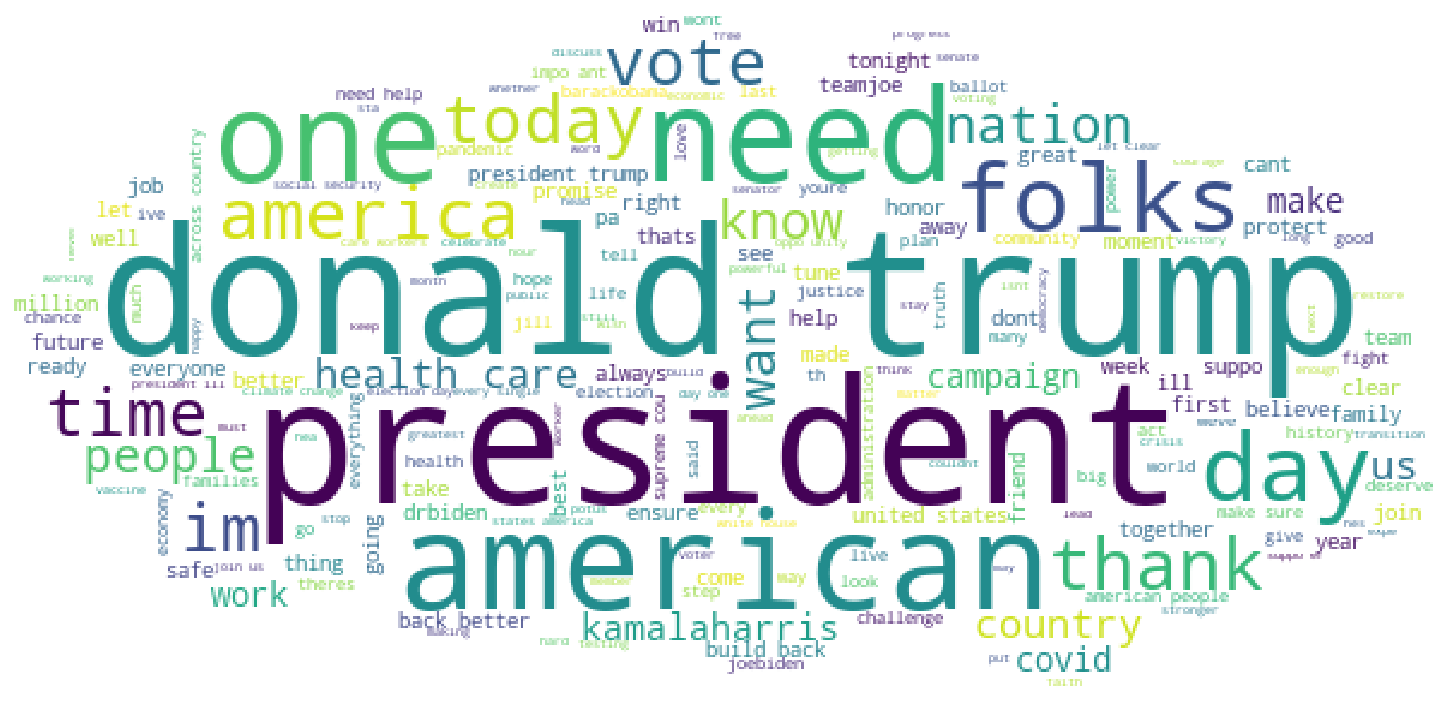

In [249]:
# WordCloud - Positive Tweets

from wordcloud import WordCloud
positive_wordcloud = WordCloud(background_color= "white",mask=mask,width=900, height=500).generate(wordcloud(positive_tweets)[0])
    
plot_Cloud(positive_wordcloud)
positive_wordcloud.to_file('joe_positive_tweets_wc.png')



# WordCloud - Neutral Tweets

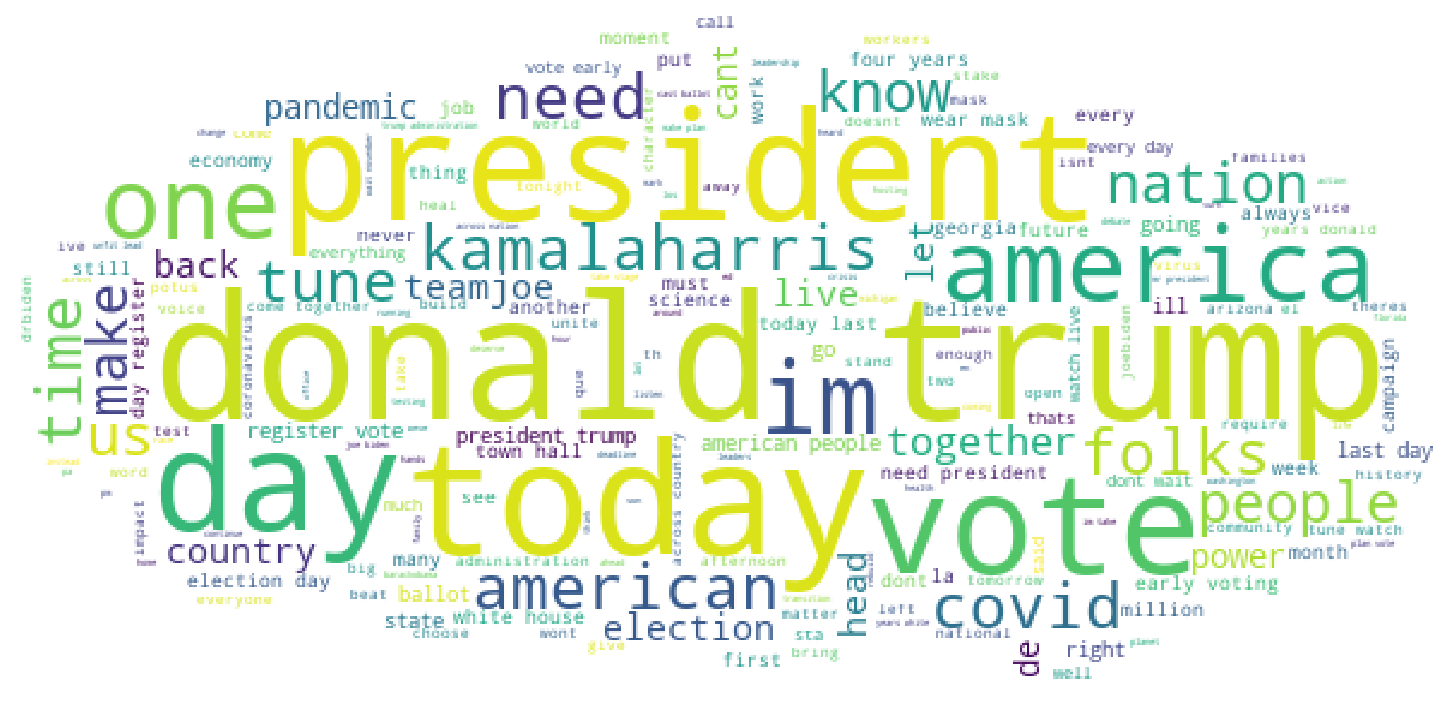

In [250]:
# WordCloud - Neutral Tweets

neutral_wordcloud = WordCloud(background_color= "white",mask=mask,width=900, height=500).generate(wordcloud(neutral_tweets)[0])

plot_Cloud(neutral_wordcloud)
neutral_wordcloud.to_file('joe_neutral_tweets_wc.png')


# Wordcloud - All Tweets

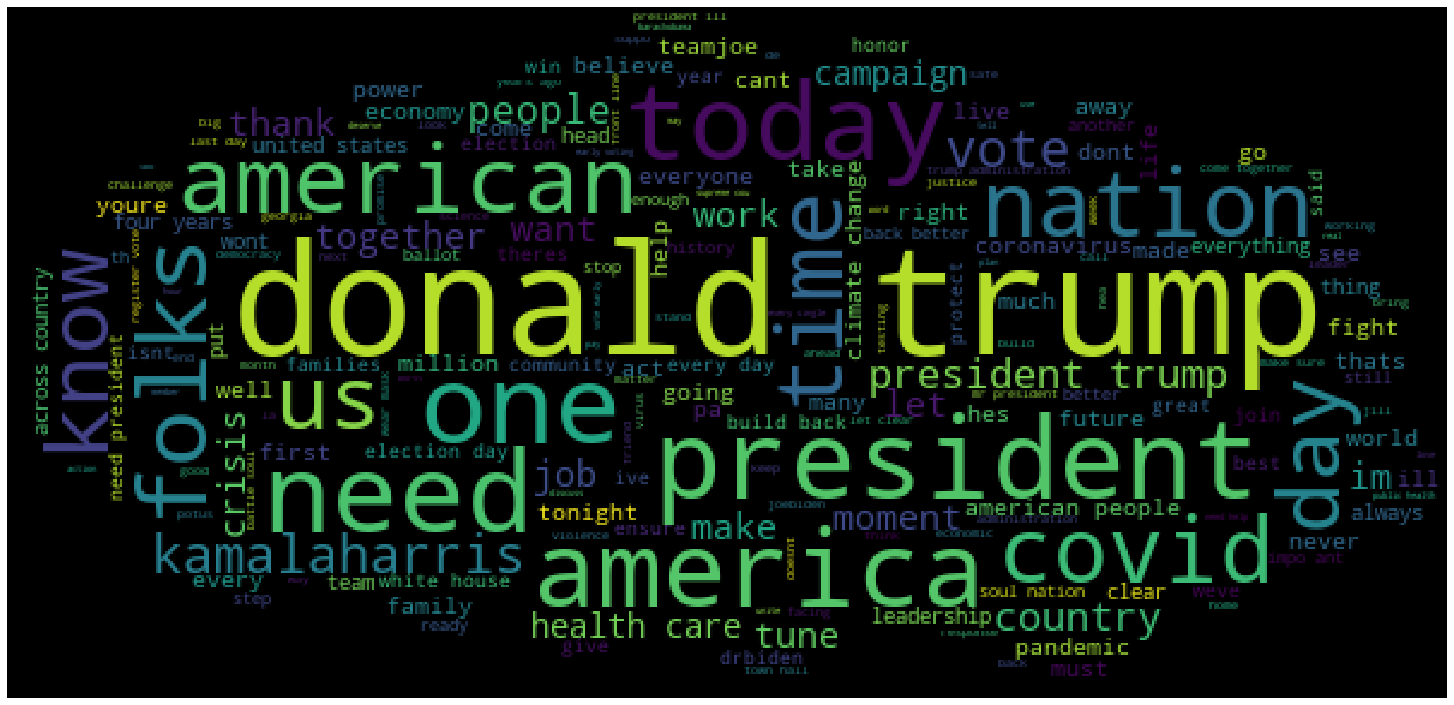

In [251]:
# Wordcloud - All Tweets

total_wordcloud = WordCloud( mask=mask,width=900, height=500).generate(wordcloud(dfs)[0])

plot_Cloud(total_wordcloud)
total_wordcloud.to_file('joe_total_tweets_wc.png')


# Most Frequent Words - Total Tweets

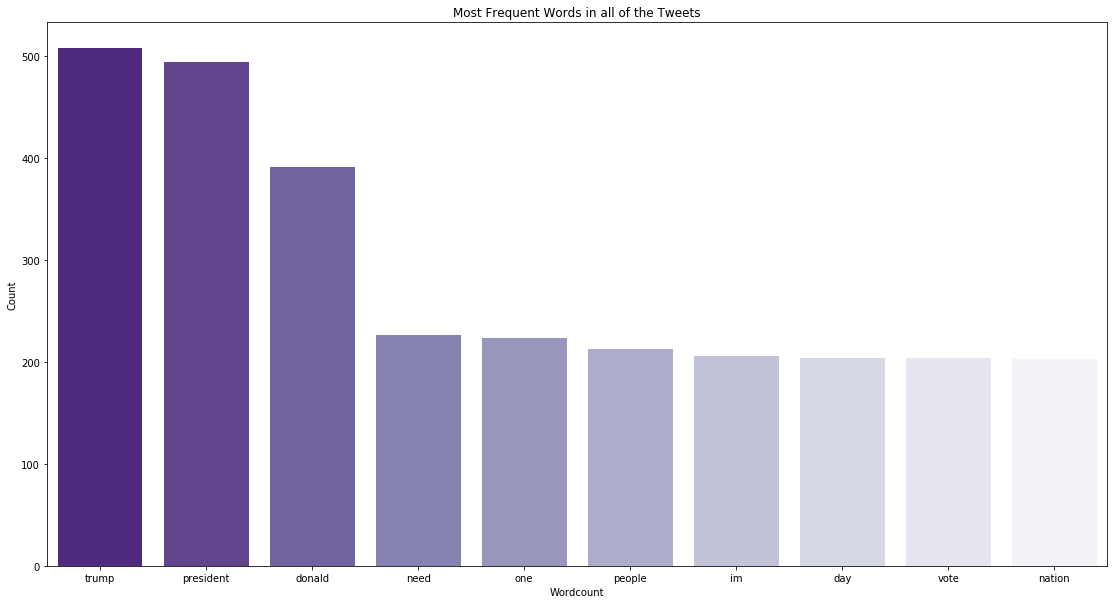

In [252]:
# Most Frequent Words - Total Tweets

aa = nltk.FreqDist(wordcloud(dfs)[1])
dd = pd.DataFrame({'Wordcount': list(aa.keys()),
                  'Count': list(aa.values())})
# selecting top 10 most frequent hashtags     
dd = dd.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in all of the Tweets')
ax = sns.barplot(data=dd, palette="Purples_r",x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("joe_total_tweets_wf.png")
plt.show()

# Most Frequent Words - Positive Tweets

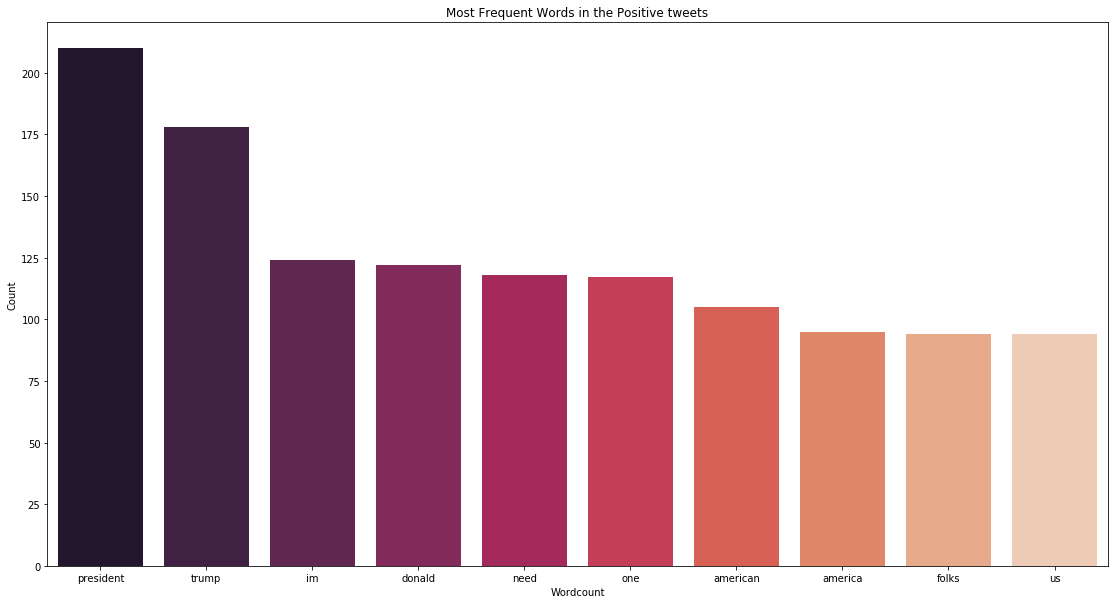

In [253]:
# Most Frequent Words - Positive Tweets

ap = nltk.FreqDist(wordcloud(positive_tweets)[1])
dp = pd.DataFrame({'Wordcount': list(ap.keys()),
                  'Count': list(ap.values())})
# selecting top 10 most frequent hashtags     
dp = dp.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in the Positive tweets')
ax = sns.barplot(data=dp,palette="rocket", x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("joe_positive_tweets_wf.png")
plt.show()

# Most Frequent Words - Neutral Tweets

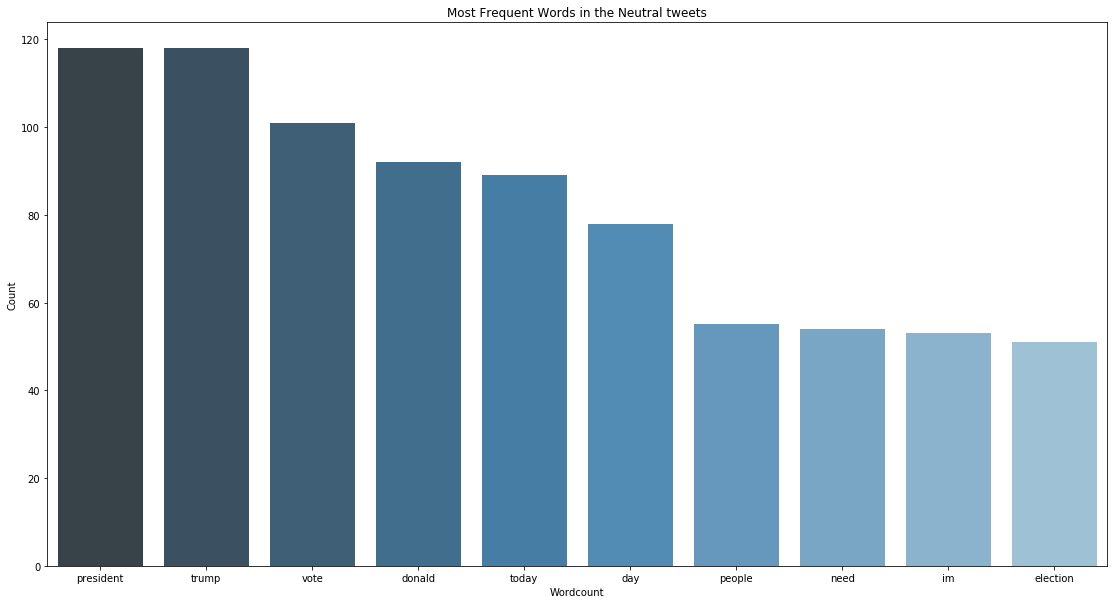

In [255]:
# Most Frequent Words - Neutral Tweets

au = nltk.FreqDist(wordcloud(neutral_tweets)[1])
du = pd.DataFrame({'Wordcount': list(au.keys()),
                  'Count': list(au.values())})
# selecting top 10 most frequent hashtags     
du = du.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in the Neutral tweets')
ax = sns.barplot(data=du, palette= "Blues_d",x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("joe_neutral_tweets_wf.png")
plt.show()